In [77]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#Importing dataset
df=pd.read_csv('/content/Position_Salaries.csv')
print(df)
print('dataset iomported successfully')

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
dataset iomported successfully


## Data pre-processing

In [79]:
#checking null values
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [80]:
#checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [81]:
#Checking statistical values
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


## Data Visualisation

## Defining Input variable and Output vaiable




In [83]:
X=df[['Level']]  #Input variable
Y=df[['Salary']] #output or target variable

Text(0, 0.5, 'Salary')

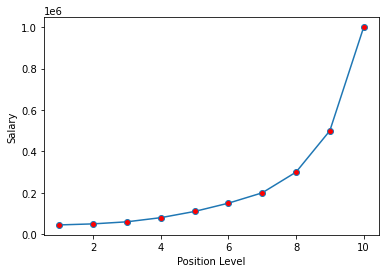

In [84]:
plt.plot(X,Y,marker='o',markerfacecolor='red')
plt.xlabel("Position Level")
plt.ylabel("Salary")

In [82]:
#Our target column is ' Salary '. In the graph we can see that it has curvilinear relationship with input variable.
# So the best model for it will be Polynomial regression.

## Training model

In [85]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression


In [86]:
poly_feature=PolynomialFeatures(degree=5)
lnr_regressor=LinearRegression()
sc=MinMaxScaler()

In [87]:
xnorm=sc.fit_transform(X)
ynorm=sc.fit_transform(Y)

In [88]:
x_poly=poly_feature.fit_transform(xnorm)

In [89]:
x_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.11111111e-01, 1.23456790e-02, 1.37174211e-03,
        1.52415790e-04, 1.69350878e-05],
       [1.00000000e+00, 2.22222222e-01, 4.93827160e-02, 1.09739369e-02,
        2.43865264e-03, 5.41922810e-04],
       [1.00000000e+00, 3.33333333e-01, 1.11111111e-01, 3.70370370e-02,
        1.23456790e-02, 4.11522634e-03],
       [1.00000000e+00, 4.44444444e-01, 1.97530864e-01, 8.77914952e-02,
        3.90184423e-02, 1.73415299e-02],
       [1.00000000e+00, 5.55555556e-01, 3.08641975e-01, 1.71467764e-01,
        9.52598689e-02, 5.29221494e-02],
       [1.00000000e+00, 6.66666667e-01, 4.44444444e-01, 2.96296296e-01,
        1.97530864e-01, 1.31687243e-01],
       [1.00000000e+00, 7.77777778e-01, 6.04938272e-01, 4.70507545e-01,
        3.65950312e-01, 2.84628021e-01],
       [1.00000000e+00, 8.88888889e-01, 7.90123457e-01, 7.02331962e-01,
        6.24295077e-01, 

In [90]:
lnr_regressor.fit(x_poly,ynorm)
print('model is trained successfully')

model is trained successfully


# Predict the salary of the employee based on their level.

In [91]:
y_pred=lnr_regressor.predict(x_poly)

No handles with labels found to put in legend.


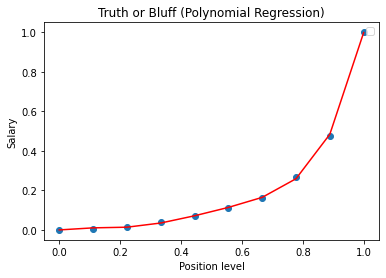

In [92]:
plt.scatter(xnorm,ynorm)
plt.plot(xnorm,y_pred,color="r")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.legend()
plt.show()

In [93]:
lnr_regressor.score(x_poly,ynorm)

0.9997969027099755